In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving california_housing_test.csv to california_housing_test.csv


In [3]:
uploaded = files.upload()

Saving california_housing_train.csv to california_housing_train.csv


In [23]:
test = pd.read_csv("california_housing_test.csv")

In [5]:
train=pd.read_csv("california_housing_train.csv")

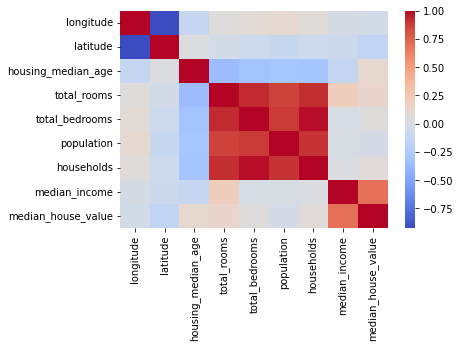

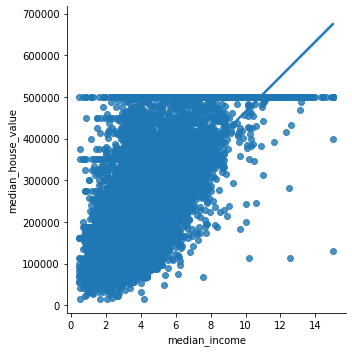

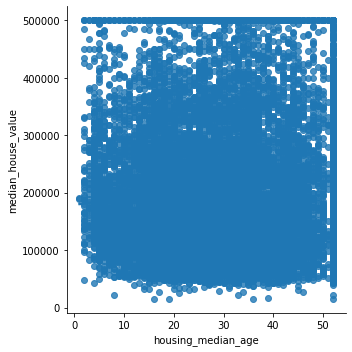

In [24]:
plt.figure()
sns.heatmap(train.corr(), cmap = 'coolwarm')
plt.show()
sns.lmplot(x = 'median_income', y = 'median_house_value', data = train)
sns.lmplot(x = 'housing_median_age', y = 'median_house_value', data = train)

In [28]:
data = train
data = data[['total_rooms', 'total_bedrooms', 'housing_median_age' ,'median_income', 'population', 'households']] 
data.info()
data['total_rooms'] = data['total_rooms'].fillna(data['total_rooms'].mean())
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].mean())


<ipython-input-28-f68e6466b329>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_rooms'] = data['total_rooms'].fillna(data['total_rooms'].mean())
<ipython-input-28-f68e6466b329>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].mean())


In [9]:
from sklearn.model_selection import train_test_split
y=train.iloc[:,8]
x_train, x_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=0)

In [10]:
print(y.name)

median_house_value


In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [12]:
print(regressor.intercept_)
print(regressor.coef_)

1.1641532182693481e-10
[ 8.20286005e-13 -9.73887637e-13 -2.14716374e-13  9.02056208e-17
 -8.11893955e-14  6.45317133e-16  7.94295185e-14 -9.10146004e-12
  1.00000000e+00]


In [26]:
predictions = regressor.predict(x_test)
predictions = predictions.reshape(-1, 1)
print(predictions)

[[171400.]
 [189600.]
 [500001.]
 ...
 [142900.]
 [128300.]
 [ 84700.]]


In [14]:
from sklearn.metrics import mean_squared_error
print('MSE', mean_squared_error(y_test,predictions))
print('RMSE', np.sqrt(mean_squared_error(y_test, predictions)))

MSE 8.182159210202765e-22
RMSE 2.8604473793801494e-11
